<h1 style="color: green; font-size: 40px;" align="center">MNIST</h1>
<h3 style="color: #3E6D9C; font-size: 15px;" align="center">Hand written digit recognition using CNN</h3>

<h2 style="color: #E0144C; font-size: 20px;" align="left">Data Processing</h2>

<p>
    The data given contains following folders. The root folder is 'data'
    <ol>
      <li>traningSet</li>
      <li>traningSample</li>
      <li>testSet</li>
      <li>testSample</li>
    </ol>
    
    
</p>
<h3>Folder tree</h3>
<img src="dataviz.png" style="width: 1000px;">


### Data for model

We get data from traningSet folder which has ten sub folders that has images of specifed folder. Total images are 42,000 

(Ex: Folder 5 contains images of 5 and their count is 3795) 

We use trainigSample data for validation which has a total of 540 images


In [1]:
# Importing libraries
import time
# Data Processing libraries
import os                              # To change between folder
from PIL import Image                  # For Image Processing
import cv2 as cv                       # For Image Processing
import shutil as st                    # To move files from one folder to other
import numpy as np                     # For array operation
import matplotlib.pyplot as plt        # For plots 

# Model Building libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
import seaborn as sns

## Getting data from folders

In [2]:
def get_data():
    
    for i in range(0,10):
        print("\nCurrent Working dir :",os.getcwd())

        if(i==0):
            os.chdir('0')
        elif(i==1):
            os.chdir('../1')
        elif(i==2):
            os.chdir('../2')
        elif(i==3):
            os.chdir('../3')
        elif(i==4):
            os.chdir('../4')
        elif(i==5):
            os.chdir('../5')
        elif(i==6):
            os.chdir('../6')
        elif(i==7):
            os.chdir('../7')
        elif(i==8):
            os.chdir('../8')
        elif(i==9):
            os.chdir('../9')

        print("Changed to dir      :",os.getcwd(),"\n")

    ##################################################################################################################### 

        imagelist = os.listdir('.')
        print("Total no.of images in folder {} are {}".format(i,len(os.listdir('.'))))


        imagepil = Image.open(imagelist[0])
        imagepil.show()
        time.sleep(1)

        print("Checking image formats\n")
        time.sleep(1)
        # Checking Image formats

        jpg = 0
        png = 0
        jpeg = 0
        gif =0
        other=0

        for image in os.listdir('.'):

            imgname, ext = os.path.splitext(image)
            if(ext=='.jpg'):
                jpg+=1
            elif(ext=='.png'):
                png+=1
            elif(ext=='.jpeg'):
                jpeg+=1
            elif(ext=='.gif'):
                gif+=1
            else:
                other+=1

        print('jpg   images in folder {} are {}'.format(i,jpg))
        print('png   images in folder {} are {}'.format(i,png))
        print('jpeg  images in folder {} are {}'.format(i,jpeg))
        print('gif   images in folder {} are {}'.format(i,gif))
        print('other images in folder {} are {}'.format(i,other))


    ################################################################################################################# 

        print("Converting all the images into numpy arrays\n")

        if(i==0):
            x_0 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_0 is : {}".format(i,x_0.shape))
            y_0 = np.empty(x_0.shape[0])
            y_0.fill(i)
            y_0 = y_0.astype(int)
            print("Dimmension of labels {} array y_0 is : {}\n".format(i,y_0.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_0[k])
                plt.axis("off")
            plt.show()
        elif(i==1):
            x_1 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_1 is : {}".format(i,x_1.shape))
            y_1 = np.empty(x_1.shape[0])
            y_1.fill(i)
            y_1 = y_1.astype(int)
            print("Dimmension of labels {} array y_1 is : {}\n".format(i,y_1.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_1[k])
                plt.axis("off")
            plt.show()
        elif(i==2):
            x_2 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_2 is : {}".format(i,x_2.shape))
            y_2 = np.empty(x_2.shape[0])
            y_2.fill(i)
            y_2 = y_2.astype(int)
            print("Dimmension of labels {} array y_2 is : {}".format(i,y_2.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_2[k])
                plt.axis("off")
            plt.show()
        elif(i==3):
            x_3 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_3 is : {}".format(i,x_3.shape))
            y_3 = np.empty(x_3.shape[0])
            y_3.fill(i)
            y_3 = y_3.astype(int)
            print("Dimmension of labels {} array y_3 is : {}".format(i,y_3.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_3[k])
                plt.axis("off")
            plt.show()
        elif(i==4):
            x_4 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_4 is : {}".format(i,x_4.shape))
            y_4 = np.empty(x_4.shape[0])
            y_4.fill(i)
            y_4 = y_4.astype(int)
            print("Dimmension of labels {} array y_4 is : {}".format(i,y_4.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_4[k])
                plt.axis("off")
            plt.show()
        elif(i==5):
            x_5 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_5 is : {}".format(i,x_5.shape))
            y_5 = np.empty(x_5.shape[0])
            y_5.fill(i)
            y_5 = y_5.astype(int)
            print("Dimmension of labels {} array y_5 is : {}".format(i,y_5.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_5[k])
                plt.axis("off")
            plt.show()
        elif(i==6):
            x_6 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_6 is : {}".format(i,x_6.shape))
            y_6 = np.empty(x_6.shape[0])
            y_6.fill(i)
            y_6 = y_6.astype(int)
            print("Dimmension of labels {} array y_6 is : {}".format(i,y_6.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_6[k])
                plt.axis("off")
            plt.show()
        elif(i==7):
            x_7 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_7 is : {}".format(i,x_7.shape))
            y_7 = np.empty(x_7.shape[0])
            y_7.fill(i)
            y_7 = y_7.astype(int)
            print("Dimmension of labels {} array y_7 is : {}".format(i,y_7.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_7[k])
                plt.axis("off")
            plt.show()
        elif(i==8):
            x_8 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_8 is : {}".format(i,x_8.shape))
            y_8 = np.empty(x_8.shape[0])
            y_8.fill(i)
            y_8 = y_8.astype(int)
            print("Dimmension of labels {} array y_8 is : {}".format(i,y_8.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_8[k])
                plt.axis("off")
            plt.show()
        elif(i==9):
            x_9 = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])
            print("Dimmension of images {} array x_9 is : {}".format(i,x_9.shape))
            y_9 = np.empty(x_9.shape[0])
            y_9.fill(i)
            y_9 = y_9.astype(int)
            print("Dimmension of labels {} array y_9 is : {}".format(i,y_9.shape))

            plt.figure(figsize=(5,5))
            for k in range(10):
                plt.subplot(1,10,k+1)
                plt.imshow(x_9[k])
                plt.axis("off")
            plt.show()


        for z in range(0,100):
            print("*",end = '')

        time.sleep(1)
    
    
    X = np.concatenate([x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9])
    Y = np.concatenate([y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,])
    
    return X, Y
    


In [3]:
os.getcwd()

'D:\\Projects\\MNIST'

In [4]:
os.chdir('data/trainingSet/trainingSet')

In [5]:
os.getcwd()

'D:\\Projects\\MNIST\\data\\trainingSet\\trainingSet'

In [6]:
os.listdir()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\0 

Total no.of images in folder 0 are 4132
Checking image formats

jpg   images in folder 0 are 4132
png   images in folder 0 are 0
jpeg  images in folder 0 are 0
gif   images in folder 0 are 0
other images in folder 0 are 0
Converting all the images into numpy arrays

Dimmension of images 0 array x_0 is : (4132, 28, 28, 3)
Dimmension of labels 0 array y_0 is : (4132,)



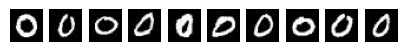

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\0
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\1 

Total no.of images in folder 1 are 4684
Checking image formats

jpg   images in folder 1 are 4684
png   images in folder 1 are 0
jpeg  images in folder 1 are 0
gif   images in folder 1 are 0
other images in folder 1 are 0
Converting all the images into numpy arrays

Dimmension of images 1 array x_1 is : (4684, 28, 28, 3)
Dimmension of labels 1 array y_1 is : (4684,)



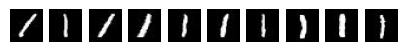

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\1
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\2 

Total no.of images in folder 2 are 4177
Checking image formats

jpg   images in folder 2 are 4177
png   images in folder 2 are 0
jpeg  images in folder 2 are 0
gif   images in folder 2 are 0
other images in folder 2 are 0
Converting all the images into numpy arrays

Dimmension of images 2 array x_2 is : (4177, 28, 28, 3)
Dimmension of labels 2 array y_2 is : (4177,)


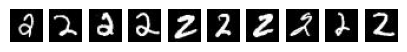

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\2
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\3 

Total no.of images in folder 3 are 4351
Checking image formats

jpg   images in folder 3 are 4351
png   images in folder 3 are 0
jpeg  images in folder 3 are 0
gif   images in folder 3 are 0
other images in folder 3 are 0
Converting all the images into numpy arrays

Dimmension of images 3 array x_3 is : (4351, 28, 28, 3)
Dimmension of labels 3 array y_3 is : (4351,)


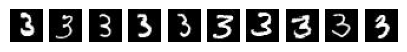

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\3
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\4 

Total no.of images in folder 4 are 4072
Checking image formats

jpg   images in folder 4 are 4072
png   images in folder 4 are 0
jpeg  images in folder 4 are 0
gif   images in folder 4 are 0
other images in folder 4 are 0
Converting all the images into numpy arrays

Dimmension of images 4 array x_4 is : (4072, 28, 28, 3)
Dimmension of labels 4 array y_4 is : (4072,)


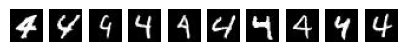

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\4
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\5 

Total no.of images in folder 5 are 3795
Checking image formats

jpg   images in folder 5 are 3795
png   images in folder 5 are 0
jpeg  images in folder 5 are 0
gif   images in folder 5 are 0
other images in folder 5 are 0
Converting all the images into numpy arrays

Dimmension of images 5 array x_5 is : (3795, 28, 28, 3)
Dimmension of labels 5 array y_5 is : (3795,)


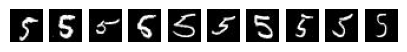

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\5
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\6 

Total no.of images in folder 6 are 4137
Checking image formats

jpg   images in folder 6 are 4137
png   images in folder 6 are 0
jpeg  images in folder 6 are 0
gif   images in folder 6 are 0
other images in folder 6 are 0
Converting all the images into numpy arrays

Dimmension of images 6 array x_6 is : (4137, 28, 28, 3)
Dimmension of labels 6 array y_6 is : (4137,)


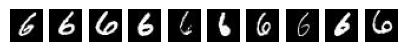

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\6
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\7 

Total no.of images in folder 7 are 4401
Checking image formats

jpg   images in folder 7 are 4401
png   images in folder 7 are 0
jpeg  images in folder 7 are 0
gif   images in folder 7 are 0
other images in folder 7 are 0
Converting all the images into numpy arrays

Dimmension of images 7 array x_7 is : (4401, 28, 28, 3)
Dimmension of labels 7 array y_7 is : (4401,)


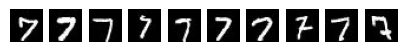

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\7
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\8 

Total no.of images in folder 8 are 4063
Checking image formats

jpg   images in folder 8 are 4063
png   images in folder 8 are 0
jpeg  images in folder 8 are 0
gif   images in folder 8 are 0
other images in folder 8 are 0
Converting all the images into numpy arrays

Dimmension of images 8 array x_8 is : (4063, 28, 28, 3)
Dimmension of labels 8 array y_8 is : (4063,)


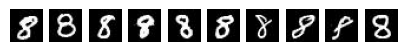

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSet\trainingSet\8
Changed to dir      : D:\Projects\MNIST\data\trainingSet\trainingSet\9 

Total no.of images in folder 9 are 4188
Checking image formats

jpg   images in folder 9 are 4188
png   images in folder 9 are 0
jpeg  images in folder 9 are 0
gif   images in folder 9 are 0
other images in folder 9 are 0
Converting all the images into numpy arrays

Dimmension of images 9 array x_9 is : (4188, 28, 28, 3)
Dimmension of labels 9 array y_9 is : (4188,)


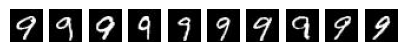

****************************************************************************************************

In [7]:
X_train, Y_train = get_data()

In [8]:
X_train.shape

(42000, 28, 28, 3)

In [9]:
Y_train.shape

(42000,)

In [10]:
os.getcwd()

'D:\\Projects\\MNIST\\data\\trainingSet\\trainingSet\\9'

In [17]:
os.chdir('../')   # Executed three times to go to data folder back

In [18]:
os.getcwd()

'D:\\Projects\\MNIST\\data'

In [19]:
os.chdir('trainingSample/trainingSample')

In [20]:
os.listdir('.')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\0 

Total no.of images in folder 0 are 60
Checking image formats

jpg   images in folder 0 are 60
png   images in folder 0 are 0
jpeg  images in folder 0 are 0
gif   images in folder 0 are 0
other images in folder 0 are 0
Converting all the images into numpy arrays

Dimmension of images 0 array x_0 is : (60, 28, 28, 3)
Dimmension of labels 0 array y_0 is : (60,)



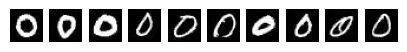

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\0
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\1 

Total no.of images in folder 1 are 60
Checking image formats

jpg   images in folder 1 are 60
png   images in folder 1 are 0
jpeg  images in folder 1 are 0
gif   images in folder 1 are 0
other images in folder 1 are 0
Converting all the images into numpy arrays

Dimmension of images 1 array x_1 is : (60, 28, 28, 3)
Dimmension of labels 1 array y_1 is : (60,)



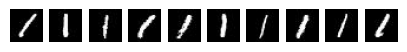

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\1
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\2 

Total no.of images in folder 2 are 60
Checking image formats

jpg   images in folder 2 are 60
png   images in folder 2 are 0
jpeg  images in folder 2 are 0
gif   images in folder 2 are 0
other images in folder 2 are 0
Converting all the images into numpy arrays

Dimmension of images 2 array x_2 is : (60, 28, 28, 3)
Dimmension of labels 2 array y_2 is : (60,)


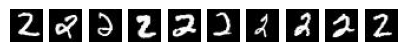

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\2
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\3 

Total no.of images in folder 3 are 60
Checking image formats

jpg   images in folder 3 are 60
png   images in folder 3 are 0
jpeg  images in folder 3 are 0
gif   images in folder 3 are 0
other images in folder 3 are 0
Converting all the images into numpy arrays

Dimmension of images 3 array x_3 is : (60, 28, 28, 3)
Dimmension of labels 3 array y_3 is : (60,)


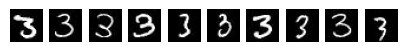

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\3
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\4 

Total no.of images in folder 4 are 60
Checking image formats

jpg   images in folder 4 are 60
png   images in folder 4 are 0
jpeg  images in folder 4 are 0
gif   images in folder 4 are 0
other images in folder 4 are 0
Converting all the images into numpy arrays

Dimmension of images 4 array x_4 is : (60, 28, 28, 3)
Dimmension of labels 4 array y_4 is : (60,)


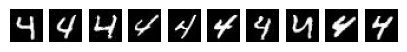

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\4
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\5 

Total no.of images in folder 5 are 60
Checking image formats

jpg   images in folder 5 are 60
png   images in folder 5 are 0
jpeg  images in folder 5 are 0
gif   images in folder 5 are 0
other images in folder 5 are 0
Converting all the images into numpy arrays

Dimmension of images 5 array x_5 is : (60, 28, 28, 3)
Dimmension of labels 5 array y_5 is : (60,)


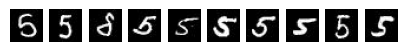

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\5
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\6 

Total no.of images in folder 6 are 60
Checking image formats

jpg   images in folder 6 are 60
png   images in folder 6 are 0
jpeg  images in folder 6 are 0
gif   images in folder 6 are 0
other images in folder 6 are 0
Converting all the images into numpy arrays

Dimmension of images 6 array x_6 is : (60, 28, 28, 3)
Dimmension of labels 6 array y_6 is : (60,)


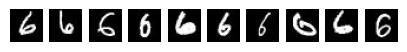

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\6
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\7 

Total no.of images in folder 7 are 60
Checking image formats

jpg   images in folder 7 are 60
png   images in folder 7 are 0
jpeg  images in folder 7 are 0
gif   images in folder 7 are 0
other images in folder 7 are 0
Converting all the images into numpy arrays

Dimmension of images 7 array x_7 is : (60, 28, 28, 3)
Dimmension of labels 7 array y_7 is : (60,)


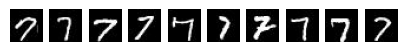

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\7
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\8 

Total no.of images in folder 8 are 60
Checking image formats

jpg   images in folder 8 are 60
png   images in folder 8 are 0
jpeg  images in folder 8 are 0
gif   images in folder 8 are 0
other images in folder 8 are 0
Converting all the images into numpy arrays

Dimmension of images 8 array x_8 is : (60, 28, 28, 3)
Dimmension of labels 8 array y_8 is : (60,)


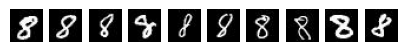

****************************************************************************************************
Current Working dir : D:\Projects\MNIST\data\trainingSample\trainingSample\8
Changed to dir      : D:\Projects\MNIST\data\trainingSample\trainingSample\9 

Total no.of images in folder 9 are 60
Checking image formats

jpg   images in folder 9 are 60
png   images in folder 9 are 0
jpeg  images in folder 9 are 0
gif   images in folder 9 are 0
other images in folder 9 are 0
Converting all the images into numpy arrays

Dimmension of images 9 array x_9 is : (60, 28, 28, 3)
Dimmension of labels 9 array y_9 is : (60,)


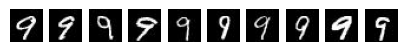

****************************************************************************************************

In [21]:
X_val, Y_val = get_data()

In [22]:
X_val.shape

(600, 28, 28, 3)

In [23]:
Y_val.shape

(600,)

In [24]:
# Normalizaion
X_train = X_train.astype('float')/255
X_val =  X_val.astype('float')/255

Y_train = to_categorical(Y_train, num_classes=10)
Y_val = to_categorical(Y_val, num_classes=10)

<h2 style="color: #E0144C; font-size: 20px;" align="left">Model Building</h2>

In [25]:
def CNN():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,3)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    
    return model 

In [26]:
digit_recognizer = CNN()

In [27]:
digit_recognizer.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [28]:
history = digit_recognizer.fit(X_train,Y_train, batch_size=128, epochs=30)

Epoch 1/30
329/329 [==============================] - 39s 114ms/step - loss: 0.2631 - accuracy: 0.9150
Epoch 2/30
329/329 [==============================] - 35s 105ms/step - loss: 0.0795 - accuracy: 0.9767
Epoch 3/30
329/329 [==============================] - 39s 117ms/step - loss: 0.0597 - accuracy: 0.9825
Epoch 4/30
329/329 [==============================] - 37s 113ms/step - loss: 0.0456 - accuracy: 0.9857
Epoch 5/30
329/329 [==============================] - 35s 106ms/step - loss: 0.0417 - accuracy: 0.9877
Epoch 6/30
329/329 [==============================] - 35s 107ms/step - loss: 0.0347 - accuracy: 0.9897
Epoch 7/30
329/329 [==============================] - 35s 107ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 8/30
329/329 [==============================] - 35s 108ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 9/30
329/329 [==============================] - 36s 108ms/step - loss: 0.0250 - accuracy: 0.9921
Epoch 10/30
329/329 [==============================] - 35s 107ms/step - l

In [31]:
loss,acc = digit_recognizer.evaluate(X_val,Y_val)
print("Loss on test data     :", loss)
print("Accuracy on test data :", acc)

19/19 [==============================] - 0s 9ms/step - loss: 6.3077e-05 - accuracy: 1.0000
Loss on test data     : 6.307657895376906e-05
Accuracy on test data : 1.0


In [33]:
Y_pred = digit_recognizer.predict(X_val)
Y_prd_class = np.argmax(Y_pred[:], axis=1)

In [35]:
Y_true = np.argmax(Y_val[:], axis=1)

<AxesSubplot:>

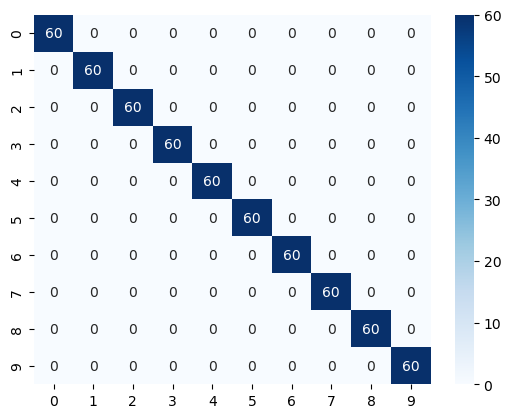

In [38]:
confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g', ) 

In [41]:
f1score = f1_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
prec    = precision_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
recall  = recall_score(Y_true, Y_prd_class,pos_label='positive',average='micro')

print("f1 score on testing data     :", f1score)
print("prec score on testing data   :",prec)
print("recall score on testing data :",recall)

f1 score on testing data     : 1.0
prec score on testing data   : 1.0
recall score on testing data : 1.0


D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(0.5, 0, 'Epochs')

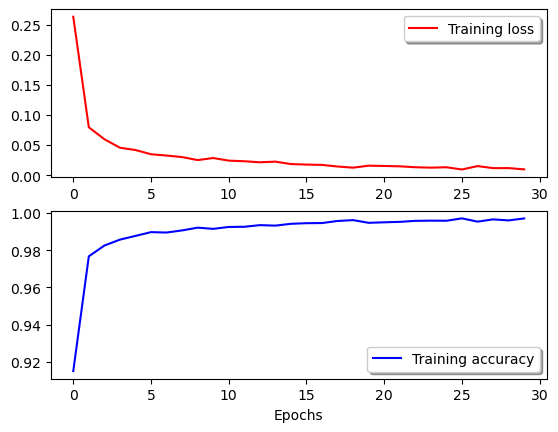

In [47]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)


plt.xlabel("Epochs")

# Testing the model 

#### We have 28,000 images unlabeld in the testsample folder. So we make the predictiond on that data a move those files to their labeld folders based on the predictions made by the model

In [48]:
os.getcwd()

'D:\\Projects\\MNIST\\data\\trainingSample\\trainingSample\\9'

In [55]:
os.chdir('../')   # Executed three times

In [56]:
os.getcwd()

'D:\\Projects\\MNIST\\data'

In [58]:
os.chdir('testSet/testSet - Copy')                # test - Copy is folder that was copied from orginal testset folder

In [59]:
len(os.listdir('.'))

28000

In [61]:
imglist = os.listdir(".")
imglist[0:10]

['img_1.jpg',
 'img_10.jpg',
 'img_100.jpg',
 'img_1000.jpg',
 'img_10000.jpg',
 'img_10001.jpg',
 'img_10002.jpg',
 'img_10003.jpg',
 'img_10004.jpg',
 'img_10005.jpg']

In [60]:
X_test = np.asarray([cv.imread(file) for file in os.listdir(os.getcwd())])

In [62]:
X_test.shape

(28000, 28, 28, 3)

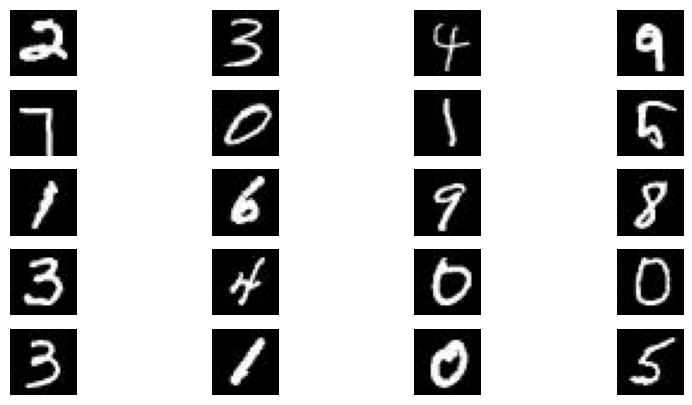

In [63]:
plt.figure(figsize=(10,5))

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.imshow(X_test[i],cmap='gray')
    plt.axis("off")
plt.show()

In [64]:
Y_test_prd = digit_recognizer.predict(X_test)
Y_prd = np.argmax(Y_test_prd, axis=1)

n = len(Y_prd)
print(n)

28000


In [67]:
for p in range(n):
    
    src_file = imglist[p] 
    src_folder = r"D:/Projects/MNIST/data/testSet/testSet - Copy/"
    src_path = src_folder + src_file
    
    dest_lab = str(Y_prd[p])
    dest_folder = r"D:/Projects/MNIST/data/testSet/"
    dest_path = dest_folder + dest_lab
    
    st.move(src_path, dest_path)

# Using Sigmoid activation

In [70]:
def CNN_SIG():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (28,28,3)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "sigmoid"))
    
    return model 

In [71]:
digit_recognizer_sig = CNN_SIG()

digit_recognizer_sig.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

history = digit_recognizer_sig.fit(X_train,Y_train, batch_size=128, epochs=30)

Epoch 1/30
329/329 [==============================] - 38s 115ms/step - loss: 0.2597 - accuracy: 0.9156
Epoch 2/30
329/329 [==============================] - 37s 114ms/step - loss: 0.0796 - accuracy: 0.9760
Epoch 3/30
329/329 [==============================] - 36s 111ms/step - loss: 0.0538 - accuracy: 0.9832
Epoch 4/30
329/329 [==============================] - 36s 110ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 5/30
329/329 [==============================] - 36s 111ms/step - loss: 0.0375 - accuracy: 0.9892
Epoch 6/30
329/329 [==============================] - 42s 128ms/step - loss: 0.0339 - accuracy: 0.9895
Epoch 7/30
329/329 [==============================] - 44s 135ms/step - loss: 0.0307 - accuracy: 0.9909
Epoch 8/30
329/329 [==============================] - 37s 114ms/step - loss: 0.0294 - accuracy: 0.9907
Epoch 9/30
329/329 [==============================] - 39s 117ms/step - loss: 0.0272 - accuracy: 0.9910
Epoch 10/30
329/329 [==============================] - 40s 120ms/step - l

In [72]:
loss,acc = digit_recognizer_sig.evaluate(X_val,Y_val)
print("Loss on test data     :", loss)
print("Accuracy on test data :", acc)

19/19 [==============================] - 0s 10ms/step - loss: 0.0034 - accuracy: 0.9983
Loss on test data     : 0.0034050317481160164
Accuracy on test data : 0.9983333349227905


f1 score on testing data     : 0.9983333333333333
prec score on testing data   : 0.9983333333333333
recall score on testing data : 0.9983333333333333


D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(0.5, 0, 'Epochs')

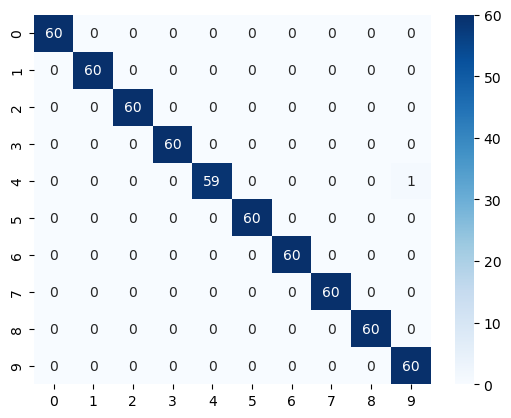

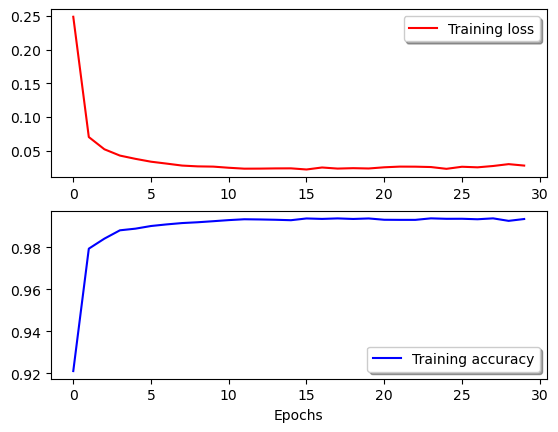

In [80]:
Y_pred = digit_recognizer_sig.predict(X_val)
Y_prd_class = np.argmax(Y_pred[:], axis=1)

Y_true = np.argmax(Y_val[:], axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g', ) 

f1score = f1_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
prec    = precision_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
recall  = recall_score(Y_true, Y_prd_class,pos_label='positive',average='micro')

print("f1 score on testing data     :", f1score)
print("prec score on testing data   :",prec)
print("recall score on testing data :",recall)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)


plt.xlabel("Epochs")

# Softmax with RmsProp optimizer

In [75]:
digit_recognizer_sft_rms = CNN()

In [76]:
digit_recognizer_sft_rms.compile(optimizer = 'RMSprop' , loss = "categorical_crossentropy", metrics=["accuracy"])
history = digit_recognizer_sft_rms.fit(X_train,Y_train, batch_size=128, epochs=30)

Epoch 1/30
329/329 [==============================] - 47s 140ms/step - loss: 0.2488 - accuracy: 0.9210
Epoch 2/30
329/329 [==============================] - 44s 134ms/step - loss: 0.0701 - accuracy: 0.9793
Epoch 3/30
329/329 [==============================] - 38s 117ms/step - loss: 0.0520 - accuracy: 0.9840
Epoch 4/30
329/329 [==============================] - 41s 125ms/step - loss: 0.0426 - accuracy: 0.9880
Epoch 5/30
329/329 [==============================] - 41s 125ms/step - loss: 0.0377 - accuracy: 0.9888
Epoch 6/30
329/329 [==============================] - 39s 119ms/step - loss: 0.0335 - accuracy: 0.9901
Epoch 7/30
329/329 [==============================] - 46s 141ms/step - loss: 0.0307 - accuracy: 0.9908
Epoch 8/30
329/329 [==============================] - 40s 122ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 9/30
329/329 [==============================] - 41s 124ms/step - loss: 0.0266 - accuracy: 0.9919
Epoch 10/30
329/329 [==============================] - 39s 118ms/step - l

In [78]:
loss,acc = digit_recognizer_sft_rms.evaluate(X_val,Y_val)
print("Loss on test data     :", loss)
print("Accuracy on test data :", acc)

19/19 [==============================] - 0s 11ms/step - loss: 0.0223 - accuracy: 0.9967
Loss on test data     : 0.022282421588897705
Accuracy on test data : 0.996666669845581


f1 score on testing data     : 0.9966666666666667
prec score on testing data   : 0.9966666666666667
recall score on testing data : 0.9966666666666667


D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(0.5, 0, 'Epochs')

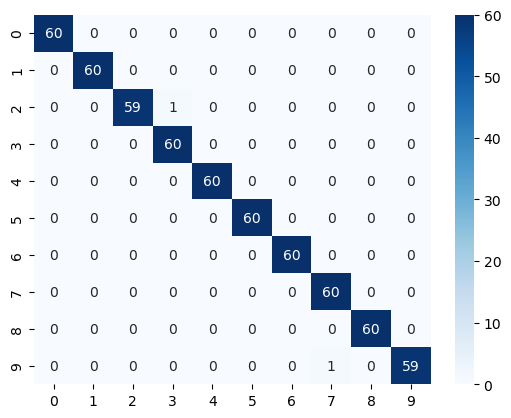

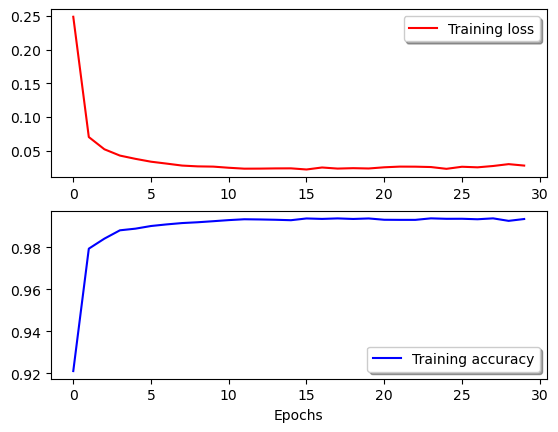

In [79]:
Y_pred = digit_recognizer_sft_rms.predict(X_val)
Y_prd_class = np.argmax(Y_pred[:], axis=1)

Y_true = np.argmax(Y_val[:], axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g', ) 

f1score = f1_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
prec    = precision_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
recall  = recall_score(Y_true, Y_prd_class,pos_label='positive',average='micro')

print("f1 score on testing data     :", f1score)
print("prec score on testing data   :",prec)
print("recall score on testing data :",recall)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)


plt.xlabel("Epochs")

# Softmax with SGD

In [81]:
digit_recognizer_sft_sgd = CNN()

digit_recognizer_sft_sgd.compile(optimizer = 'SGD' , loss = "categorical_crossentropy", metrics=["accuracy"])
history = digit_recognizer_sft_sgd.fit(X_train,Y_train, batch_size=128, epochs=30)


Epoch 1/30
329/329 [==============================] - 36s 107ms/step - loss: 1.5181 - accuracy: 0.4843
Epoch 2/30
329/329 [==============================] - 35s 107ms/step - loss: 0.4047 - accuracy: 0.8720
Epoch 3/30
329/329 [==============================] - 39s 117ms/step - loss: 0.2526 - accuracy: 0.9229
Epoch 4/30
329/329 [==============================] - 37s 112ms/step - loss: 0.2027 - accuracy: 0.9380
Epoch 5/30
329/329 [==============================] - 38s 114ms/step - loss: 0.1707 - accuracy: 0.9472
Epoch 6/30
329/329 [==============================] - 36s 108ms/step - loss: 0.1524 - accuracy: 0.9536
Epoch 7/30
329/329 [==============================] - 34s 104ms/step - loss: 0.1393 - accuracy: 0.9568
Epoch 8/30
329/329 [==============================] - 36s 108ms/step - loss: 0.1275 - accuracy: 0.9601
Epoch 9/30
329/329 [==============================] - 38s 115ms/step - loss: 0.1186 - accuracy: 0.9628
Epoch 10/30
329/329 [==============================] - 36s 109ms/step - l

19/19 [==============================] - 0s 12ms/step - loss: 0.0133 - accuracy: 0.9950
Loss on test data     : 0.013260585255920887
Accuracy on test data : 0.9950000047683716
f1 score on testing data     : 0.995
prec score on testing data   : 0.995
recall score on testing data : 0.995


D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(0.5, 0, 'Epochs')

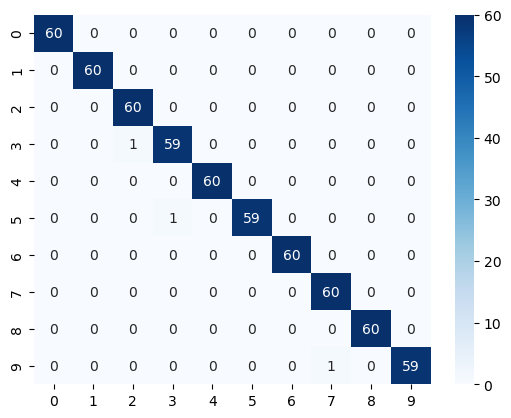

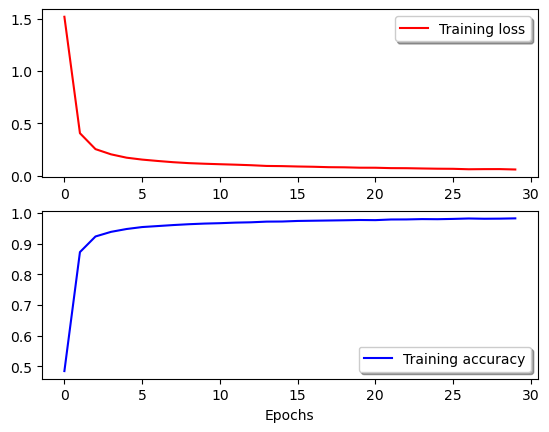

In [82]:
loss,acc = digit_recognizer_sft_sgd.evaluate(X_val,Y_val)
print("Loss on test data     :", loss)
print("Accuracy on test data :", acc)

Y_pred = digit_recognizer_sft_sgd.predict(X_val)
Y_prd_class = np.argmax(Y_pred[:], axis=1)

Y_true = np.argmax(Y_val[:], axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g', ) 

f1score = f1_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
prec    = precision_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
recall  = recall_score(Y_true, Y_prd_class,pos_label='positive',average='micro')

print("f1 score on testing data     :", f1score)
print("prec score on testing data   :",prec)
print("recall score on testing data :",recall)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)


plt.xlabel("Epochs")


# Sigmoid with RmsProp

In [83]:
digit_recognizer_sig_rms = CNN_SIG()

digit_recognizer_sig_rms.compile(optimizer = 'RMSprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

history = digit_recognizer_sig_rms.fit(X_train,Y_train, batch_size=128, epochs=30)


Epoch 1/30
329/329 [==============================] - 39s 116ms/step - loss: 0.2566 - accuracy: 0.9188
Epoch 2/30
329/329 [==============================] - 36s 110ms/step - loss: 0.0708 - accuracy: 0.9788
Epoch 3/30
329/329 [==============================] - 35s 108ms/step - loss: 0.0537 - accuracy: 0.9842
Epoch 4/30
329/329 [==============================] - 35s 105ms/step - loss: 0.0448 - accuracy: 0.9866
Epoch 5/30
329/329 [==============================] - 35s 106ms/step - loss: 0.0372 - accuracy: 0.9892
Epoch 6/30
329/329 [==============================] - 35s 106ms/step - loss: 0.0352 - accuracy: 0.9890
Epoch 7/30
329/329 [==============================] - 35s 106ms/step - loss: 0.0311 - accuracy: 0.9907
Epoch 8/30
329/329 [==============================] - 35s 107ms/step - loss: 0.0299 - accuracy: 0.9914
Epoch 9/30
329/329 [==============================] - 35s 106ms/step - loss: 0.0264 - accuracy: 0.9921
Epoch 10/30
329/329 [==============================] - 39s 117ms/step - l

In [84]:
loss,acc = digit_recognizer_sig_rms.evaluate(X_val,Y_val)
print("Loss on test data     :", loss)
print("Accuracy on test data :", acc)


19/19 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 1.0000
Loss on test data     : 0.002771182218566537
Accuracy on test data : 1.0


f1 score on testing data     : 1.0
prec score on testing data   : 1.0
recall score on testing data : 1.0


D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(0.5, 0, 'Epochs')

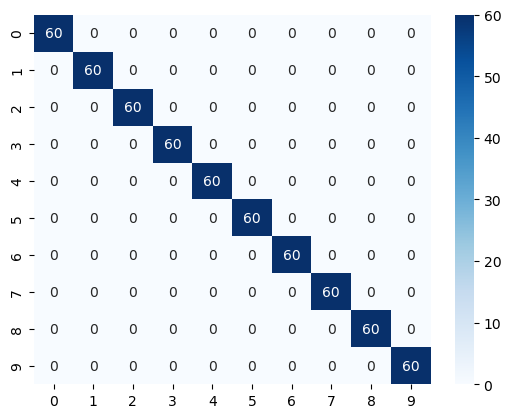

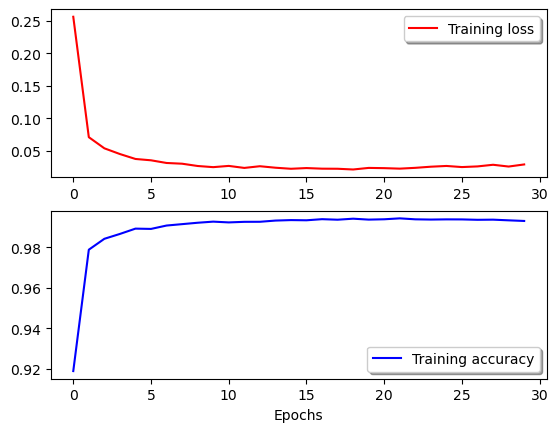

In [85]:
Y_pred = digit_recognizer_sig_rms.predict(X_val)
Y_prd_class = np.argmax(Y_pred[:], axis=1)

Y_true = np.argmax(Y_val[:], axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g', ) 

f1score = f1_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
prec    = precision_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
recall  = recall_score(Y_true, Y_prd_class,pos_label='positive',average='micro')

print("f1 score on testing data     :", f1score)
print("prec score on testing data   :",prec)
print("recall score on testing data :",recall)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)


plt.xlabel("Epochs")

# Sigmoid with sgd

In [86]:
digit_recognizer_sig_sgd = CNN_SIG()

digit_recognizer_sig_sgd.compile(optimizer = 'SGD' , loss = "categorical_crossentropy", metrics=["accuracy"])

history = digit_recognizer_sig_sgd.fit(X_train,Y_train, batch_size=128, epochs=30)


Epoch 1/30
329/329 [==============================] - 39s 117ms/step - loss: 1.4386 - accuracy: 0.4965
Epoch 2/30
329/329 [==============================] - 39s 117ms/step - loss: 0.4451 - accuracy: 0.8587
Epoch 3/30
329/329 [==============================] - 40s 120ms/step - loss: 0.2843 - accuracy: 0.9115
Epoch 4/30
329/329 [==============================] - 40s 123ms/step - loss: 0.2180 - accuracy: 0.9316
Epoch 5/30
329/329 [==============================] - 41s 124ms/step - loss: 0.1830 - accuracy: 0.9419
Epoch 6/30
329/329 [==============================] - 38s 115ms/step - loss: 0.1616 - accuracy: 0.9515
Epoch 7/30
329/329 [==============================] - 37s 113ms/step - loss: 0.1461 - accuracy: 0.9550
Epoch 8/30
329/329 [==============================] - 39s 118ms/step - loss: 0.1308 - accuracy: 0.9596
Epoch 9/30
329/329 [==============================] - 35s 106ms/step - loss: 0.1235 - accuracy: 0.9620
Epoch 10/30
329/329 [==============================] - 34s 104ms/step - l

In [87]:
loss,acc = digit_recognizer_sig_sgd.evaluate(X_val,Y_val)
print("Loss on test data     :", loss)
print("Accuracy on test data :", acc)


19/19 [==============================] - 0s 11ms/step - loss: 0.0120 - accuracy: 0.9983
Loss on test data     : 0.012016186490654945
Accuracy on test data : 0.9983333349227905


f1 score on testing data     : 0.9983333333333333
prec score on testing data   : 0.9983333333333333
recall score on testing data : 0.9983333333333333


D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
D:\Softwares\Anaconda\envs\all\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Text(0.5, 0, 'Epochs')

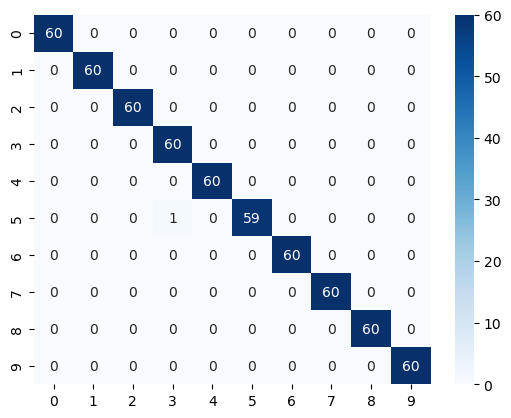

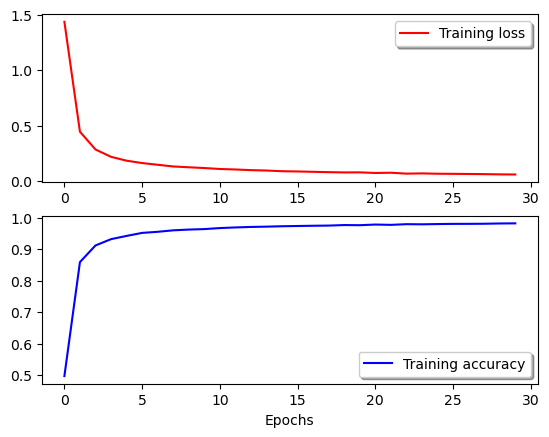

In [88]:
Y_pred = digit_recognizer_sig_sgd.predict(X_val)
Y_prd_class = np.argmax(Y_pred[:], axis=1)

Y_true = np.argmax(Y_val[:], axis=1)

confusion_mtx = confusion_matrix(Y_true, Y_prd_class)
sns.heatmap(confusion_mtx, annot=True,cmap='Blues',fmt='.9g', ) 

f1score = f1_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
prec    = precision_score(Y_true, Y_prd_class,pos_label='positive',average='micro')
recall  = recall_score(Y_true, Y_prd_class,pos_label='positive',average='micro')

print("f1 score on testing data     :", f1score)
print("prec score on testing data   :",prec)
print("recall score on testing data :",recall)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='r', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)


plt.xlabel("Epochs")